In [345]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

"Serão utilizadas na clusterização 3 variáveis (Preço médio - Renda - e Vr do FGTS)"

In [346]:
tenda = pd.read_csv('base.segmentacao.tenda.csv',sep=';',decimal = ',')

In [347]:
tenda.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [348]:
tenda.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO168923N6K9S2200046,156700.0,2250.0,0.0
1,PRO169451T5N0Q1117181,130980.0,2250.0,0.0
2,PRO17071400035345011,150336.7,5207.9,23286.8
3,PRO17071800383346255,145000.0,2130.8,0.0
4,PRO17071800387345493,117000.0,1973.2,0.0


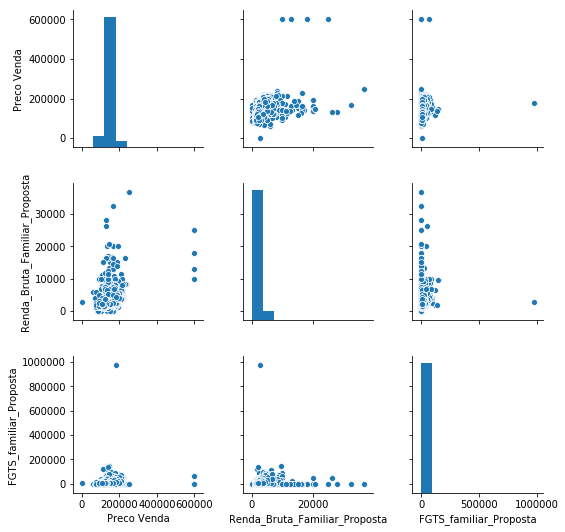

In [349]:
sb.pairplot(tenda)

In [350]:
tenda.drop('Chave unica',axis = 1, inplace=True)

In [351]:
tenda

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,156700.0,2250.0,0.0
1,130980.0,2250.0,0.0
2,150336.7,5207.9,23286.8
3,145000.0,2130.8,0.0
4,117000.0,1973.2,0.0
5,125000.0,1491.0,7794.8
6,123375.2,4134.5,0.0
7,126927.9,1919.4,11600.0
8,130000.0,3257.7,15998.1
9,135768.0,2656.1,11035.3


K-MEANS

In [352]:
from sklearn.cluster import KMeans

In [353]:
wcss = []

In [354]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

1 12851933007302.219
2 6278731549567.808
3 4689038764140.395
4 4107799122198.247
5 3662795609494.832
6 3293501379512.294
7 3063821228411.084
8 2394100706217.9614
9 2231538189682.301


In [355]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [356]:
kmeans.fit(tenda)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [357]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0])

CLASSES CRIADAS

In [358]:
tenda['Kclasses'] = kmeans.labels_

In [359]:
tenda

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,156700.0,2250.0,0.0,1
1,130980.0,2250.0,0.0,0
2,150336.7,5207.9,23286.8,1
3,145000.0,2130.8,0.0,1
4,117000.0,1973.2,0.0,0
5,125000.0,1491.0,7794.8,0
6,123375.2,4134.5,0.0,0
7,126927.9,1919.4,11600.0,0
8,130000.0,3257.7,15998.1,0
9,135768.0,2656.1,11035.3,0


In [360]:
tenda['Kclasses'] = kmeans.labels_

In [361]:
tenda.Kclasses.value_counts()

0    15553
1     8064
2     3581
Name: Kclasses, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


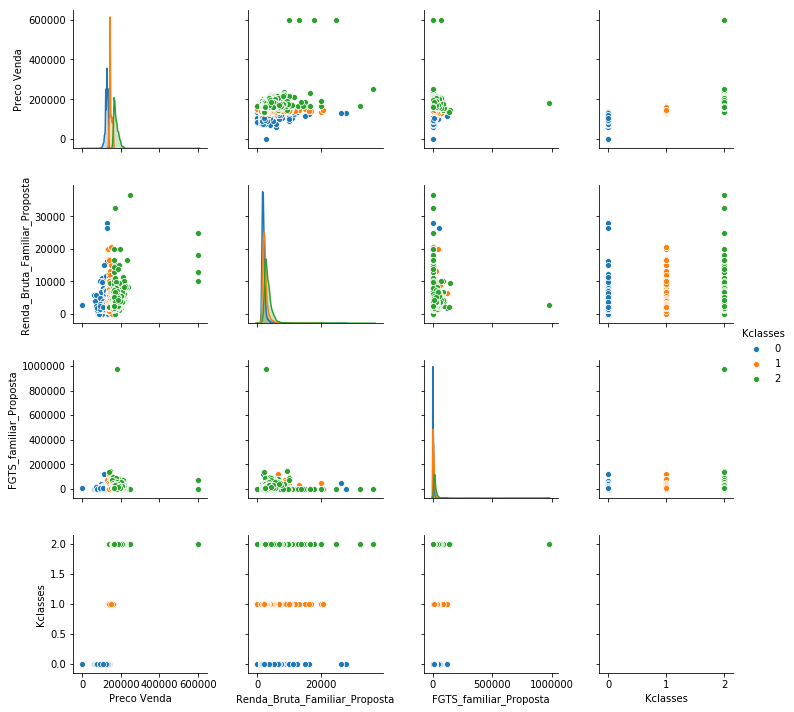

In [362]:
sb.pairplot(tenda,hue='Kclasses')

In [363]:
tenda.to_csv('clustertenda.csv',sep=';',decimal=',')